## Random Forest Car Classification

In this data set, we will be using a random forest implementation to classify if a car is accpetable or not in safety.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

Count of missing values in the dataset: 0
         count unique    top  freq
buying    1728      4  vhigh   432
maint     1728      4  vhigh   432
doors     1728      4      2   432
persons   1728      3      2   576
lug_boot  1728      3  small   576
safety    1728      3    low   576
class     1728      4  unacc  1210


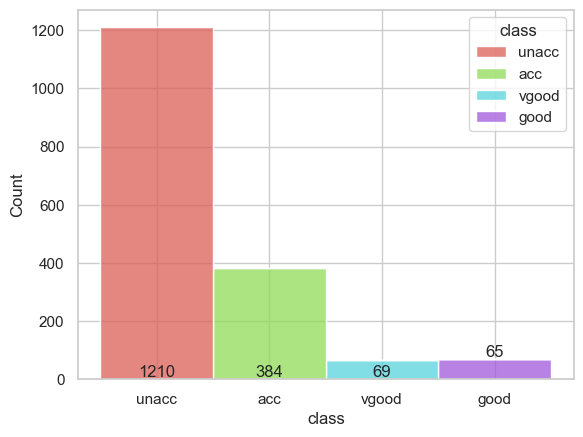

In [ ]:
# the data didnt have column names so we add them here
col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df = pd.read_csv("car_data.csv", header=None, names=col_names)

# check for missing values
print(f"Count of missing values in the dataset: {df.isnull().sum().sum()}")

# generally handy info to have and see
print(df.describe().transpose())  # transposed for easier reading

# quick check to show the class distribution
g0 = sns.histplot(data=df, x="class", hue="class", multiple="stack", palette="hls")
g0.bar_label(container=g0.containers[0], labels=df["class"].value_counts().values) # why did this put the values at the bottom? 

# actually quick one liner to make this a binary classification, acceptable or not
# it doesn't really make senese to have 4 classes when it boils down to safe or not safe
df["class"] = df["class"].apply(lambda x: 0 if x == "unacc" else 1) # unacceptable = 0, acceptable = 1. makes sense to me




### Seaborn is a super handy library that can allow us to visualize our daya rather easily, and beautifully.

[Text(0, 0, '1210'), Text(0, 0, '518')]

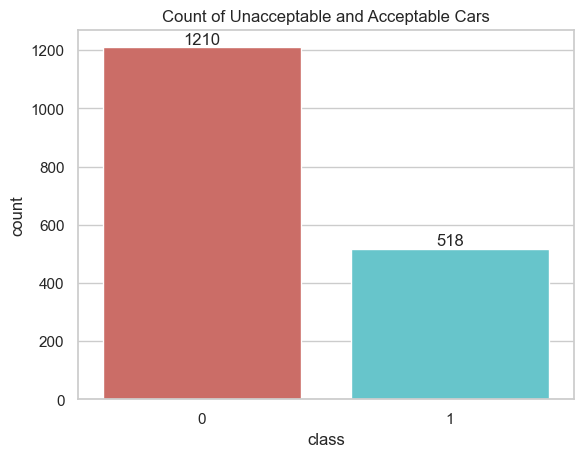

In [100]:
graph = sns.countplot(x="class", data=df, palette="hls")
graph.title.set_text("Count of Unacceptable and Acceptable Cars")
abs_values = df["class"].value_counts(ascending=False).values
graph.bar_label(container=graph.containers[0], labels=abs_values)
# https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot thanks

[Text(0, 0, '576'), Text(0, 0, '576'), Text(0, 0, '576')]

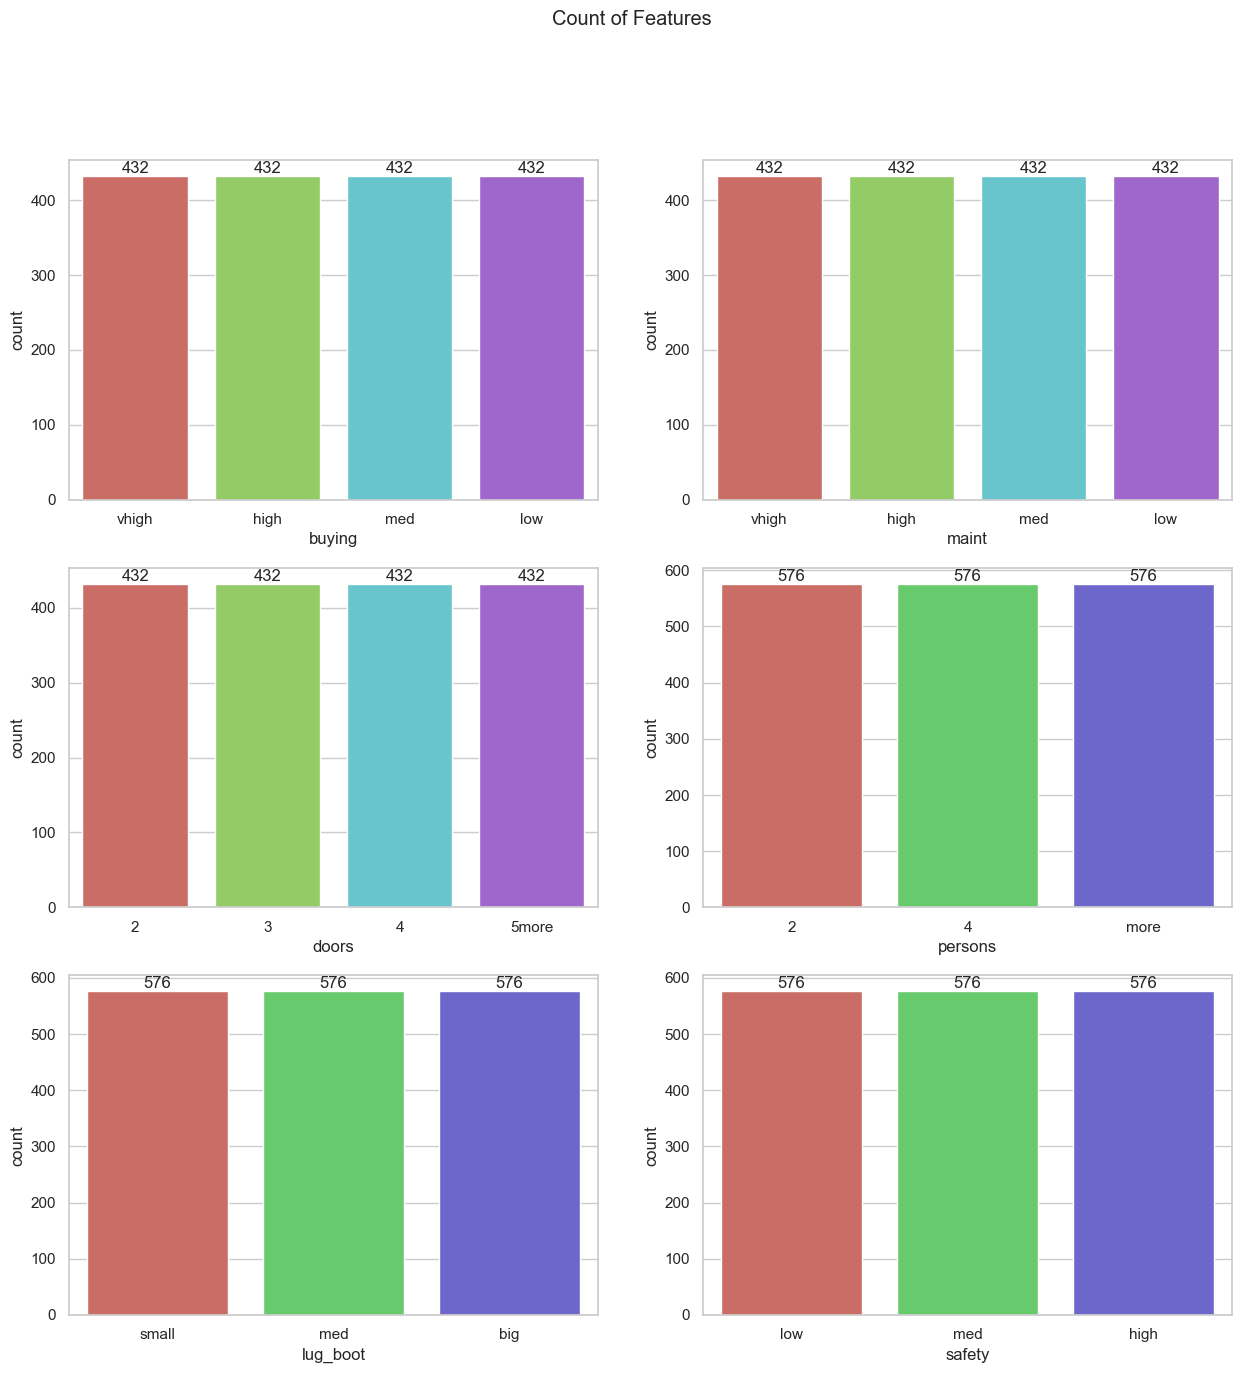

In [101]:
# plot all the features
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Count of Features")
# print(df["buying"].value_counts())
# print(df["maint"].value_counts())

# https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
# theres gotta be a better way to do this but this is the best I could find
g1 = sns.countplot(ax=axs[0, 0], x="buying", data=df, palette="hls")
g1.bar_label(container=g1.containers[0], labels=df["buying"].value_counts().values)

g2 = sns.countplot(ax=axs[0, 1], x="maint", data=df, palette="hls")
g2.bar_label(container=g2.containers[0], labels=df["maint"].value_counts().values)

g3 = sns.countplot(ax=axs[1, 0], x="doors", data=df, palette="hls")
g3.bar_label(container=g3.containers[0], labels=df["doors"].value_counts().values)

g4 = sns.countplot(ax=axs[1, 1], x="persons", data=df, palette="hls")
g4.bar_label(container=g4.containers[0], labels=df["persons"].value_counts().values)

g5 = sns.countplot(ax=axs[2, 0], x="lug_boot", data=df, palette="hls")
g5.bar_label(container=g5.containers[0], labels=df["lug_boot"].value_counts().values)

g6 = sns.countplot(ax=axs[2, 1], x="safety", data=df, palette="hls")
g6.bar_label(container=g6.containers[0], labels=df["safety"].value_counts().values)




## We can see that this data set is super balanced (besides the count of acceptable and unacceptable cars)

This would be a pretty hard data set for a human ton interpert. Luckily we can let our machine learning superiors handle it. We can prepare the data for training now usign one hot encoding.

In [ ]:
# we can use one hot encoding to convert categorial data to numerical data
from sklearn.preprocessing import OneHotEncoder

# we have to define the categorical columns which we want to encode
categorical_columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]

# create an instance of the one hot encoder, sparse makes it return a numpy array.. it just solved some issues for me
onehot = OneHotEncoder(sparse=False)

# fit 
encoded_features = onehot.fit(df[categorical_columns])

# new df
encoded_df = pd.DataFrame(encoded_features.transform(df[categorical_columns]))
df_transformed = pd.concat([encoded_df, df["class"]], axis=1)

print(df_transformed.head())

# cool, data is ready for training


     0    1    2    3    4    5    6    7    8    9  ...   12   13   14   15  \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  1.0  0.0  0.0  0.0   

    16   17   18   19   20  class  
0  0.0  1.0  0.0  1.0  0.0      0  
1  0.0  1.0  0.0  0.0  1.0      0  
2  0.0  1.0  1.0  0.0  0.0      0  
3  1.0  0.0  0.0  1.0  0.0      0  
4  1.0  0.0  0.0  0.0  1.0      0  

[5 rows x 22 columns]


/Users/nolanpestano/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


From here, we can move this data into training batches. We will use a 80:20 split, of training and testing respectively.

In [103]:
from sklearn.model_selection import train_test_split

X = df_transformed.drop("class", axis=1)
y = df_transformed["class"]

# slit into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"X_train.shape={X_train.shape}, X_test.shape={X_test.shape}, y_train.shape={y_train.shape}, y_test.shape={y_test.shape}")

X_train.shape=(1382, 21), X_test.shape=(346, 21), y_train.shape=(1382,), y_test.shape=(346,)


Now that our data is in nice batches, we can train a model.

In this project, we will be using a Random Forest Classification. Random forest is essentially a collection of many decisison trees that eventually picks up on patterns given enough time and iterations. Random Forest is powerful for both regression and classification, but can also be extremely "hand-wave-y". 

In [ ]:
# luckily though, smarter people have done all the heavy lifting for us
from sklearn.ensemble import RandomForestClassifier

# create an instance of the random forest classifier, 100 trees, random state is for reproducing the results
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# fit the model
rf.fit(X_train, y_train) # it feels almost like cheating

RandomForestClassifier(max_depth=5, random_state=42)

We can evaulate the model using sklearn's metrics package to evaulaute our model ! 

In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# predict the test data
y_pred = rf.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}") 

# get precision, recall and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"precision: {precision}, recall: {recall}, f1: {f1}")

accuracy: 0.9826589595375722
precision: 0.9906542056074766, recall: 0.954954954954955, f1: 0.9724770642201835


*98.3%* accuracy! That's a highly impressive number. 

Furthermore, the precision recall and f1 are equally impressive.

<Axes: >

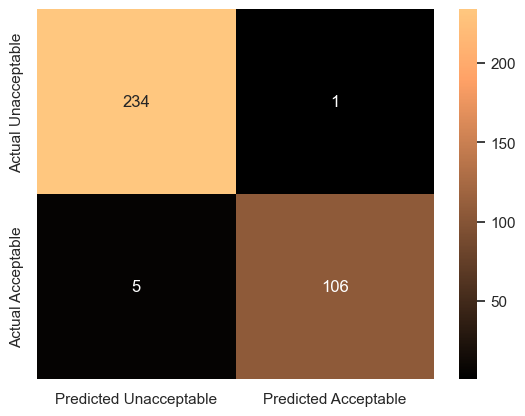

In [ ]:
# vis using seaborn
cm = confusion_matrix(y_test, y_pred) 

# we c
sns.heatmap(cm, annot=True, fmt="d", cmap="copper",
            xticklabels=["Predicted Unacceptable", "Predicted Acceptable"], yticklabels=["Actual Unacceptable", "Actual Acceptable"])

Furthermore, we can use Scykit's validation_curve to plot and show how our model's accuracy changes over each tree via cross validation.

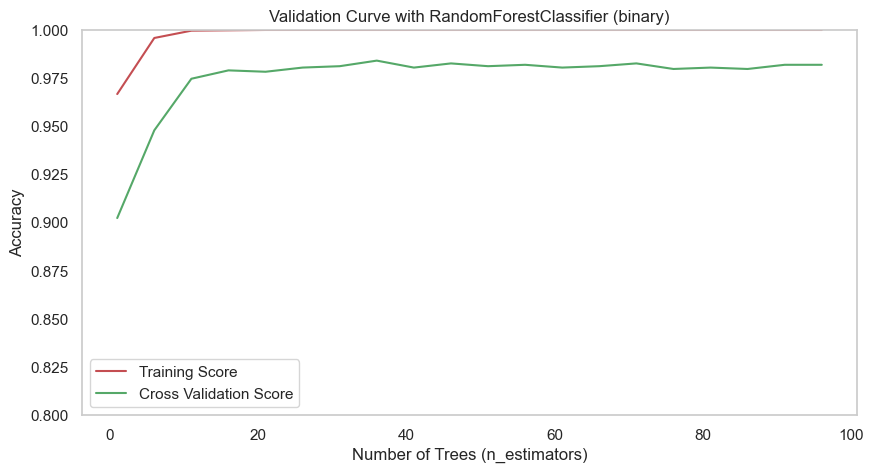

In [ ]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1,100, 5) # 1 to 100 trees, every fifth tree
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42), # random forest
    X_train, y_train, # training data
    param_name="n_estimators", 
    param_range=param_range, # 1 to 100 trees
    scoring="accuracy",
)

# calculate the mean
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the validation curve 
plt.figure(figsize=(10, 5))
plt.title("Validation Curve with RandomForestClassifier (binary)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.plot(param_range, train_scores_mean, label="Training Score", color="r")
plt.plot(param_range, test_scores_mean, label="Cross Validation Score", color="g")
plt.legend(loc="best")
plt.grid()
plt.show()

## pt 2

 this is cool, and a pretty acceptable number, but for curosity what would it look like if we didnt reduce it to a binary classifciation problem?


In [ ]:
col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df = pd.read_csv("car_data.csv", header=None, names=col_names)


# init
onehot = OneHotEncoder(sparse=False)

# fit and transform the dataset
encoded_features = onehot.fit_transform(df[col_names])

# create a new DataFrame for the encoded features
encoded_feature_names = onehot.get_feature_names_out(col_names)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# print the first few rows
print(encoded_df.head(3))


# get cols that start with class_
class_columns = [col for col in encoded_df.columns if col.startswith("class_")]
other_columns = [col for col in encoded_df.columns if col not in class_columns] # or just the features

X_new = encoded_df[other_columns]
y_new = encoded_df[class_columns]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
print(f"X_train.shape={X_train.shape}, X_test.shape={X_test.shape}, y_train.shape={y_train.shape}, y_test.shape={y_test.shape}")

   buying_high  buying_low  buying_med  buying_vhigh  maint_high  maint_low  \
0          0.0         0.0         0.0           1.0         0.0        0.0   
1          0.0         0.0         0.0           1.0         0.0        0.0   
2          0.0         0.0         0.0           1.0         0.0        0.0   

   maint_med  maint_vhigh  doors_2  doors_3  ...  lug_boot_big  lug_boot_med  \
0        0.0          1.0      1.0      0.0  ...           0.0           0.0   
1        0.0          1.0      1.0      0.0  ...           0.0           0.0   
2        0.0          1.0      1.0      0.0  ...           0.0           0.0   

   lug_boot_small  safety_high  safety_low  safety_med  class_acc  class_good  \
0             1.0          0.0         1.0         0.0        0.0         0.0   
1             1.0          0.0         0.0         1.0        0.0         0.0   
2             1.0          1.0         0.0         0.0        0.0         0.0   

   class_unacc  class_vgood  
0      

/Users/nolanpestano/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/Users/nolanpestano/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.7427745664739884
precision: 0.868865186098358, recall: 0.7427745664739884, f1: 0.7733587070947603


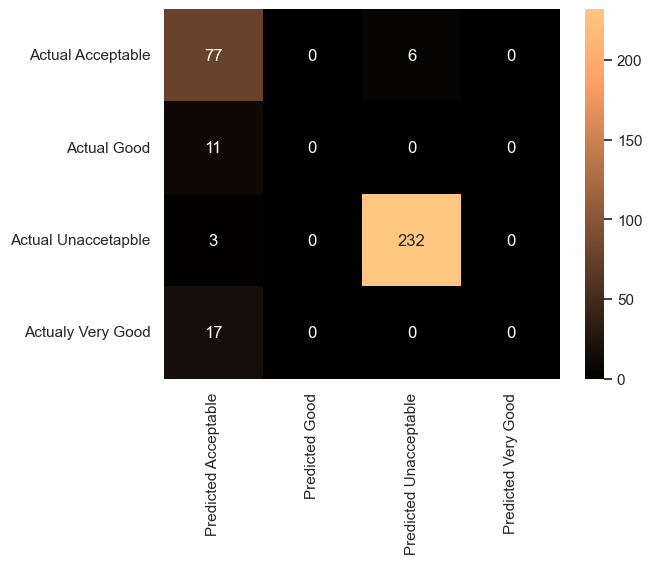

In [ ]:
# ml part

# create an instance of the random forest classifier, 100 trees, random state is for reproducing the results
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# fit the model
rf.fit(X_train_new, y_train_new) # it feels almost like cheating

# predict the test data
y_pred_new = rf.predict(X_test_new)

# calculate the accuracy
accuracy = accuracy_score(y_test_new, y_pred_new)
print(f"accuracy: {accuracy}") 

# confusion matrix, thanks to the stack overflow below
# https://stackoverflow.com/questions/46953967/multilabel-indicator-is-not-supported-for-confusion-matrix
new_confusion_matrix = confusion_matrix(y_test_new.values.argmax(axis=1), y_pred_new.argmax(axis=1))
x_labels = ["Predicted Acceptable", "Predicted Good", "Predicted Unacceptable", "Predicted Very Good"] # another stack overflw
y_labels = ["Actual Acceptable", "Actual Good", "Actual Unaccetapble", "Actualy Very Good"] 
sns.heatmap(new_confusion_matrix, annot=True, fmt="d", cmap="copper", xticklabels=x_labels, yticklabels=y_labels)

# get precision, recall and f1 score
# weighted tag because we have multiple classes
precision = precision_score(y_test_new, y_pred_new, average="weighted")
recall = recall_score(y_test_new, y_pred_new, average="weighted")
f1 = f1_score(y_test_new, y_pred_new, average="weighted")

print(f"precision: {precision}, recall: {recall}, f1: {f1}")

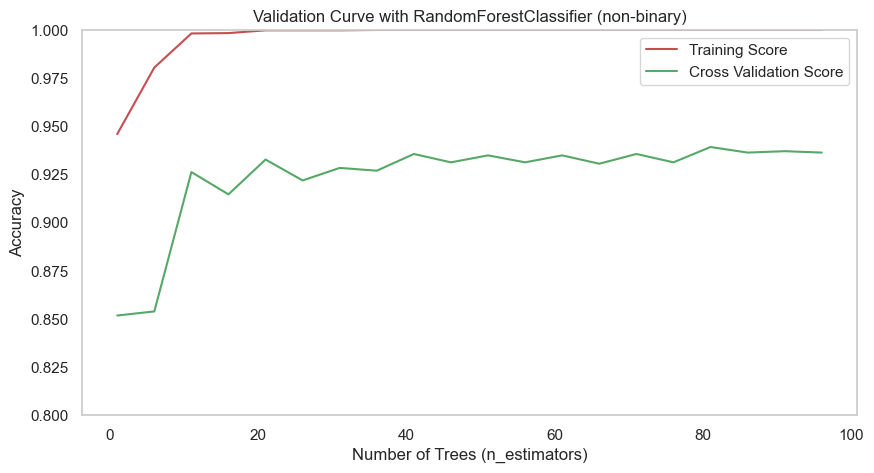

In [ ]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1,100, 5) # 1 to 100 trees, every fifth tree
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42), # random forest
    X_train_new, y_train_new, # training data
    param_name="n_estimators", 
    param_range=param_range, # 1 to 100 trees
    scoring="accuracy",
)

# find meam
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the validation curve
plt.figure(figsize=(10, 5))
plt.title("Validation Curve with RandomForestClassifier (non-binary)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.plot(param_range, train_scores_mean, label="Training Score", color="r")
plt.plot(param_range, test_scores_mean, label="Cross Validation Score", color="g")
plt.legend(loc="best")
plt.grid()
plt.show()

These results make sense. With there being more classes, it is harder for the Random Forest model to make up its mind. Not only that, but this data is ***heavily*** skeweed to unacceptable. Thus, that means that the model has less examples to determine what is considered acceptable, good, and very good.

## Conclusion

This data set was fun to touch! The hardest part by far was dancing around seaborn and matplotlib, especially when it came to the validation curve. I'm thankful that stuff is heavily documented and there are plenty of people that have had troubles before me. 

If I were to imrpove the model, I think my first step would be to somehow make the data set not as biased to unacceptable cars. There is a significant imbalance in cars considered safe, and not safe. Furthermore, that disparity is even more clear when looking at thhe imblaance between unacceptable, acceptable, good, adn very good.